In [7]:
import pandas as pd     
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


data = pd.read_csv('./training.1600000.processed.noemoticon.csv', encoding='latin-1', header=None)

In [8]:

label_col = data.columns[0]   # 0=negative, 4=positive
text_col = data.columns[5]   


def sample_label(df, label, n=10000, seed=42):
    sub = df[df[label_col] == label]
    return sub.sample(n=min(n, len(sub)), random_state=seed)

neg_df = sample_label(data, 0)
pos_df = sample_label(data, 4)


In [9]:

token_re = re.compile(r"[A-Za-z]+|[가-힣]+")

stopwords = set(STOPWORDS)

stopwords.update({"rt", "http", "https","quot"})

In [10]:

def tokenize(text):
    tokens = token_re.findall(str(text).lower())
    return [t for t in tokens if len(t) > 1 and t not in stopwords]

def build_counter(d):
    c = Counter()
    for t in d[text_col]:
        c.update(tokenize(t))
    return c

neg_counter = build_counter(neg_df)
pos_counter = build_counter(pos_df)


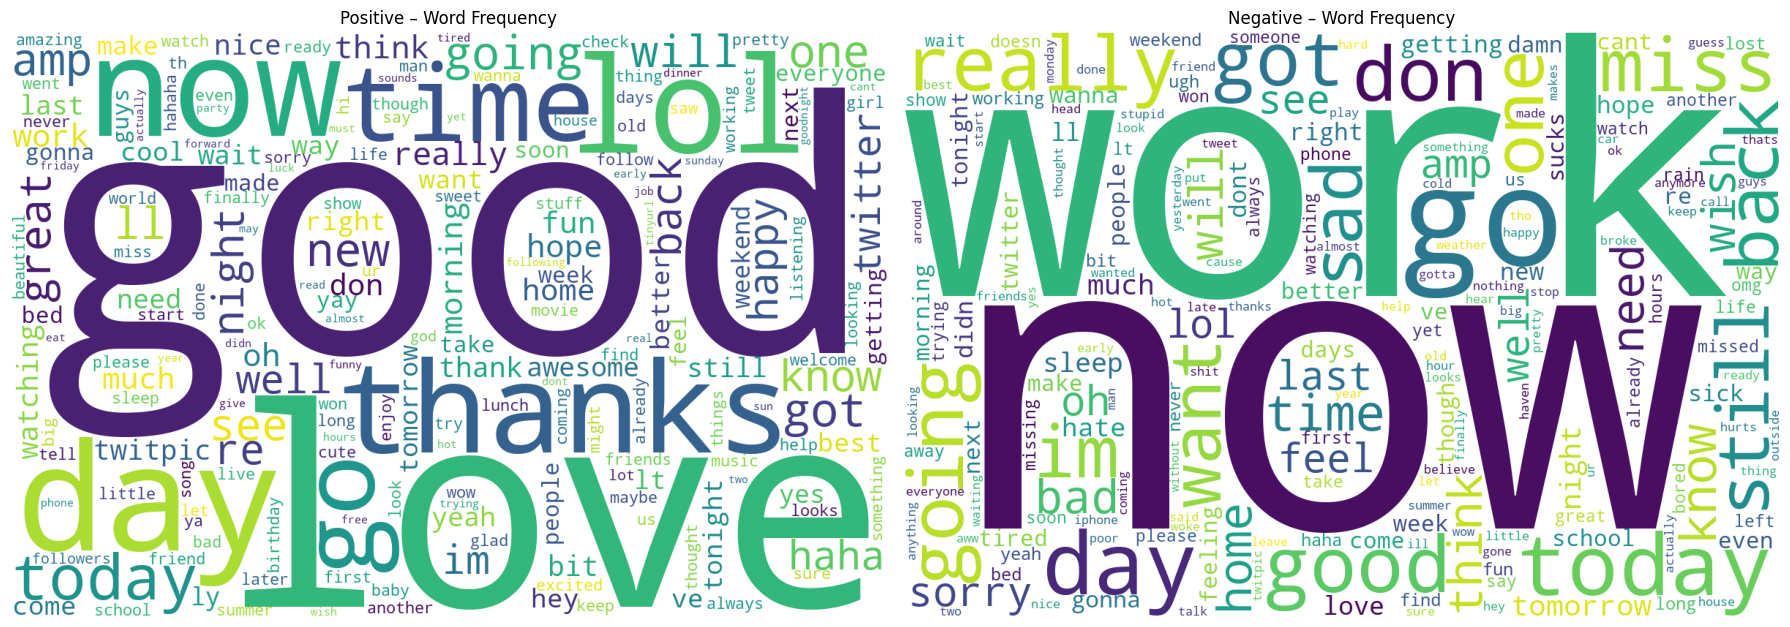

In [6]:

# WordCloud 생성

def make_wc(counter):
    return WordCloud(
        width=1200,
        height=800,
        background_color="white",
        collocations=False,
        max_words=200
    ).generate_from_frequencies(counter)

wc_neg = make_wc(neg_counter)
wc_pos = make_wc(pos_counter)

# 시각화

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

axes[1].imshow(wc_neg)
axes[1].set_title("Negative – Word Frequency")
axes[1].axis("off")

axes[0].imshow(wc_pos)
axes[0].set_title("Positive – Word Frequency")
axes[0].axis("off")

plt.tight_layout()
plt.show()
